In [5]:
import pandas as pd

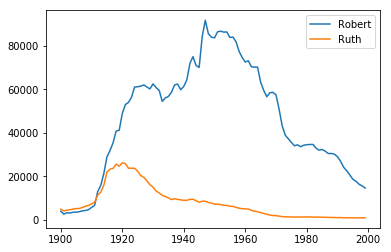

In [8]:
path = 'C:/Users/rk0f/Desktop/names/'

names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(
        path+f'yob{year}.txt', 
        names = ['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year)
names_all = names_all[names_all['Name'].isin(['Ruth', 'Robert'])]
names_all = names_all.reset_index(level=1, drop=True)
names_all = names_all.groupby([names_all.index, 'Name']).sum()
ax = names_all.unstack('Name').plot()
ax.legend(labels = ['Robert', 'Ruth'])

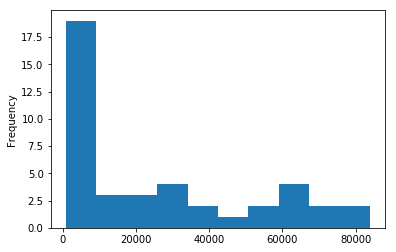

In [148]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(
        path+f'yob{year}.txt', 
        names = ['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year)
names_all = names_all[names_all['Name'].isin(['Ruth', 'Robert'])]
names_all = names_all.reset_index(level=1, drop=True)
names_all = names_all.groupby([names_all.index, 'Name']).sum()
names_all.plot(kind='hist', legend=False)

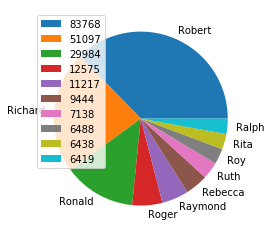

In [9]:
names_by_year = pd.read_csv(path+f'yob1950.txt', 
        names = ['Name', 'Gender', 'Count'])
names_by_year = names_by_year[names_by_year['Name'].str.contains('|'.join('R'))]
names_dynamics = names_by_year.groupby('Name').sum().sort_values('Count', ascending=False).head(10)
ax = names_dynamics.plot(kind='pie', y='Count', legend=False)
ax.set_ylabel('')
ax.legend(names_dynamics['Count'])

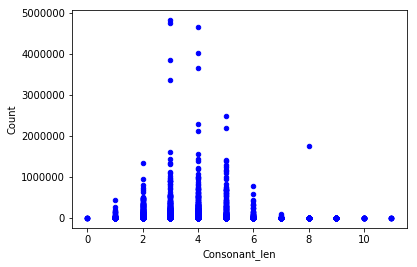

In [33]:
list_years = []
for year in range(1900, 2001):
    names_by_year = pd.read_csv(
        path+f'yob{year}.txt', 
        names = ['Name', 'Gender', 'Count'])
    list_years.append(names_by_year)
names_all = pd.concat(list_years).groupby('Name').sum()
def consonant_len(text):
    CONS = u'bcdfghjklmnpqrstvwxyz'
    return sum(1 for t in text.lower() if t in CONS)
names_all['Consonant_len'] = names_all.index.map(consonant_len)
ax = names_all.plot(kind='scatter', y='Count', x='Consonant_len', c='blue')
ax